<a href="https://colab.research.google.com/github/BrunoRaphaell/-IA-Aumentada-Prevendo-atrasos-de-voos./blob/aula_04/curso_modelo_atraso_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os dados

### Entendendo o conjunto de dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data\\flights.csv')

In [3]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
df.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [10]:
df.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [13]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [14]:
df.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


### Visualizações gráficas dos dados

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

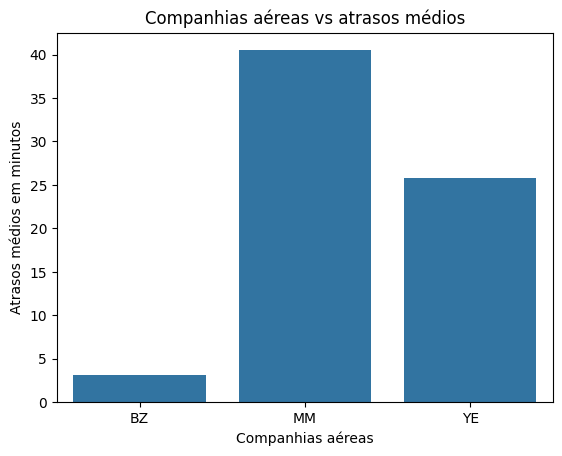

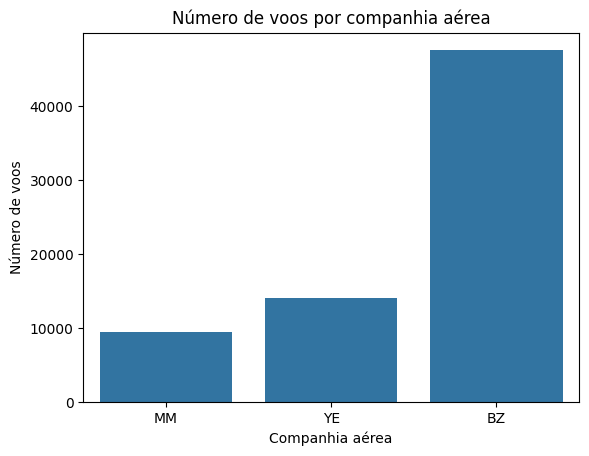

In [22]:
avarage_delay = df.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avarage_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(data=df, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

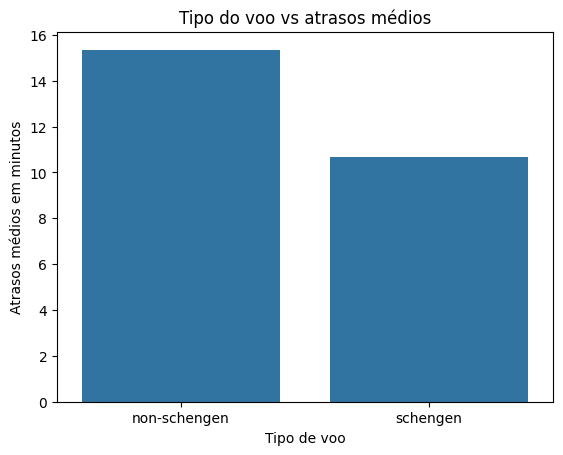

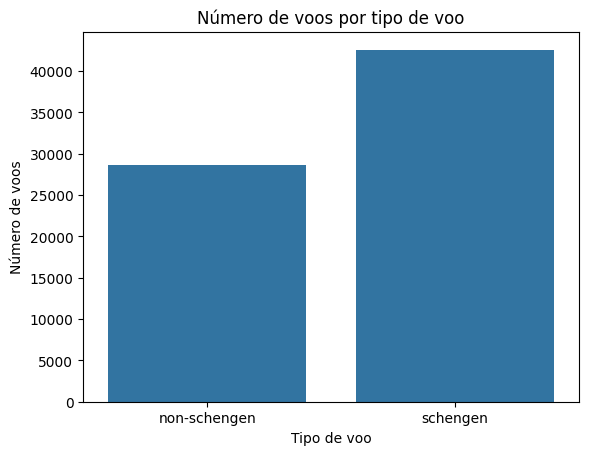

In [23]:
avarage_delay = df.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avarage_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo de voo')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(data=df, x='schengen')
plt.title('Número de voos por tipo de voo')
plt.xlabel('Tipo de voo')
plt.ylabel('Número de voos')
plt.show()

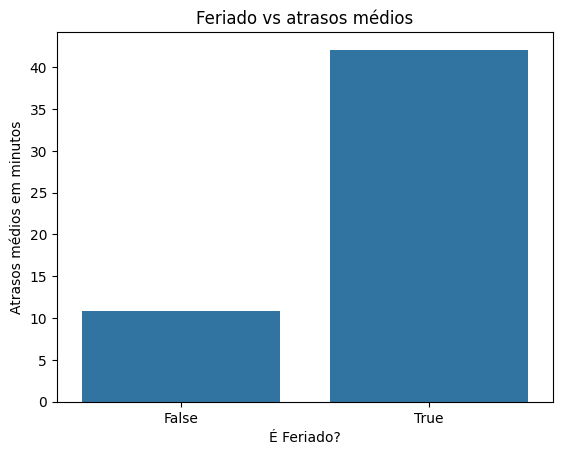

In [24]:
avarage_delay = df.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avarage_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É Feriado?')
plt.ylabel('Atrasos médios em minutos')
plt.show()


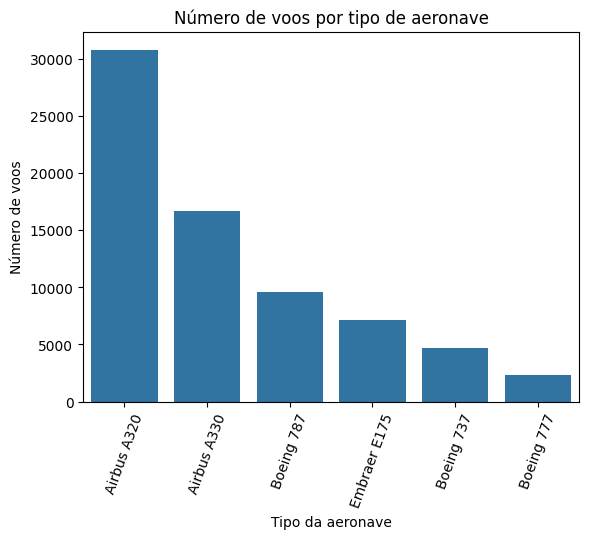

In [28]:
order = df['aircraft_type'].value_counts().index
sns.countplot(data=df, x='aircraft_type', order=order)
plt.title('Número de voos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

### Analisando a distribuição dos dados

In [35]:
import numpy as np

def caculcar_lagura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75, 25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

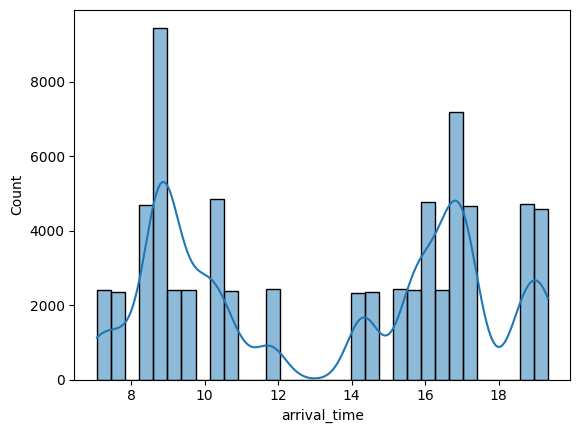

In [36]:
largura_bin_at = caculcar_lagura_bin(df, 'arrival_time')

sns.histplot(data=df, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

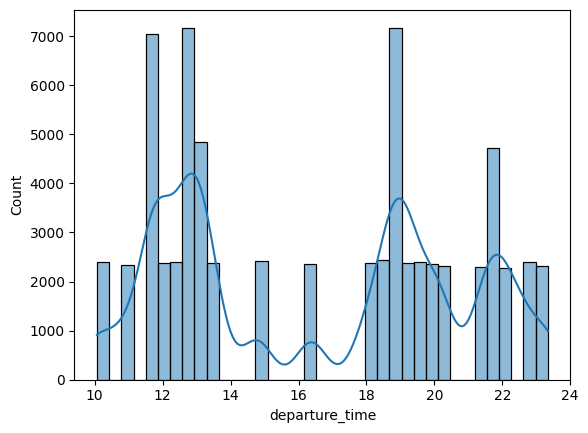

In [43]:
largura_bin_dt = caculcar_lagura_bin(df, 'departure_time')

sns.histplot(data=df, x='departure_time', kde=True, binwidth=largura_bin_dt)

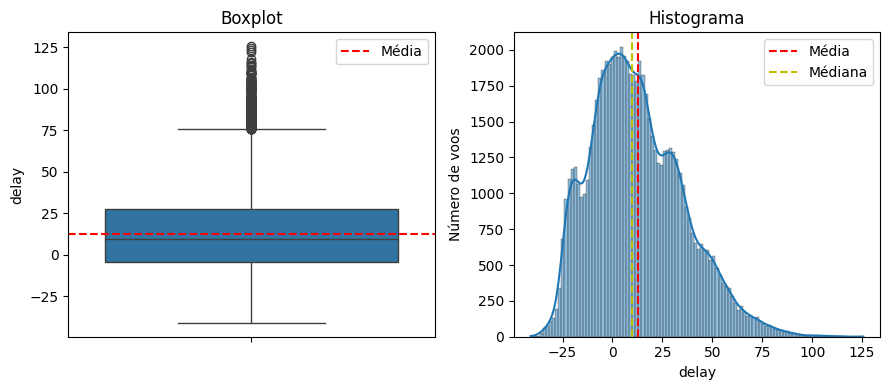

In [48]:
mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = caculcar_lagura_bin(df, 'delay')
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Médiana')
axes[1].legend()

plt.tight_layout()
plt.show()


## Feature engineering

In [54]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + (df['day'] + 1).astype(str), format='%Y-%j')

In [ ]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [58]:
df['is_weekend'] = df['date'].dt.weekday.isin([5, 6])

In [60]:
df['day_name'] = df['date'].dt.day_name()

In [61]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


### Feature Encoding

In [62]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [70]:
df['is_weekend'].unique()

array([False,  True])

In [71]:
df['schengen'] = df['schengen'].replace({'non-schengen': 0, 'schengen': 1})
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['is_weekend'] = df['is_weekend'].replace({False: 0, True: 1})


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_1148\2192662468.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['schengen'] = df['schengen'].replace({'non-schengen': 0, 'schengen': 1})
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_1148\2192662468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_1148\2192662468.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

In [72]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [73]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [77]:
df_encodede = pd.get_dummies(data=df, columns=variaveis_categoricas, dtype=int)
df_encodede.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
'''from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

dados = one_hot_enc.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
dados'''

### Limpando os Dados

In [78]:
df[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [79]:
df_clean = df_encodede.drop(['flight_id', 'departure_time', 'day', 'year', 'date' ], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Seleção e validação do modelo

### Treinamento do DummyRegressor

In [80]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [84]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

,strategy,'mean'
,constant,None
,quantile,None


In [85]:
y_pred_dummy = model_dummy.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def caculcar_lagura_regressao(y_test, y_pred):
    
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [ ]:
'''from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estratégia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")'''

In [99]:
caculcar_lagura_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 539.3584,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

### Treinamento do RandomForestRegressor

In [108]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [109]:
y_pred_rf = model_rf.predict(X_test)

In [110]:
caculcar_lagura_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 188.517,
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

c:\Users\Gabriel\Desktop\ia-prevendo-atrasos-de-voos\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


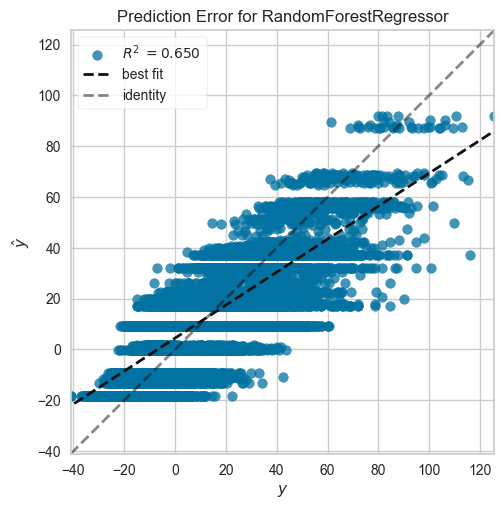

In [111]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

c:\Users\Gabriel\Desktop\ia-prevendo-atrasos-de-voos\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


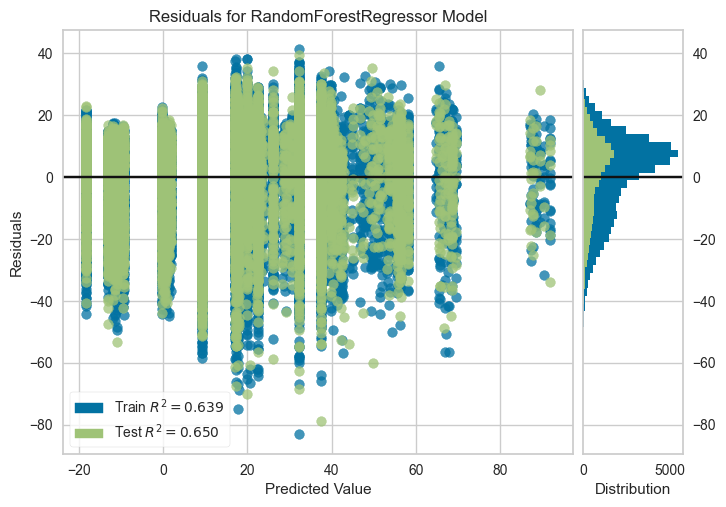

In [112]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

### Validação cruzada

In [114]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

In [115]:
cv_results

{'fit_time': array([1.53954482, 1.53125024, 1.58664274, 1.52421594, 1.50588846]),
 'score_time': array([0.0277319 , 0.02975655, 0.02972841, 0.02704811, 0.02780771]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [116]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('------------------------------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, Std: 0.0879
------------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, Std: 0.101
------------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, Std: 0.0082
------------------------------------------------------------------


## Otimização de hiperparâmetros

### Seleção de recursos

### Otimizando os hiperparâmetros com o GridSearchCV

### Salvando o modelo